<a href="https://colab.research.google.com/github/jpcompartir/dl_notebooks/blob/main/mutliclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking at a multi_class classification - following on from binary classification. Using the Keras API again, we'll build a keras.Sequential model using dense layers with relu activations into softmax classification head, we'll compile with a categorical_crossentropy loss function, rmsprop optimizer, accuracy as a metric - could add f1_precision too probably?

---

We'll be using the Reuters dataset to classify posts into 46 topics (which guides our architecture choices, we're going to need > 46 units in each of the hidden layers)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

Read the data in, using the familiar 2 tuples - load_data() and num_words = arguments. Then define the vectorise_sequences() function we defined in the binary classification problem - from memory and if you've forgotten, try to figure it out.

In [23]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [6]:
def vectorise_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] =  1
  return results

In [24]:
x_train = vectorise_sequences(train_data)
y_train = np.asarray(train_labels).astype("float32")

x_test = vectorise_sequences(test_data)
y_test = np.asarray(test_labels).astype("float32")

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])


565248/550378 [==============================] - 0s 0us/step


Write this up into a function again:

In [14]:
def decode_review(index, data = train_data):
  word_index = reuters.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  
  return " ".join([reverse_word_index.get(i - 3, "?") for i in data[index]])

In [15]:
decode_review(1)

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

Our loss function - categorical cross entropy will expect our labels to be formatted in one-hot form. We can use the Keras API or define our own function, following similar logic to our vectorise_sequences function. We'll be outputting the scores for each topic, so we'll need to set dimensions as 46.

In [20]:
def to_one_hot_labels(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))

  for index, label in enumerate(labels):
    results[index, label] = 1 
  
  return results

In [25]:
y_train = to_one_hot_labels(train_labels)
y_test = to_one_hot_labels(test_labels)

Or using the Keras API

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Oki, now we can look at building the model.

In [47]:
model = keras.Sequential([
  layers.Dense(64, activation = "relu"),
  layers.Dense(64, activation = "relu"),
  layers.Dense(46, activation = "softmax")
])

In [48]:
model.compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)

Set up the validation splits, taking 1k labels this time:

In [49]:
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

It's now model training time:

In [50]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data  = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.6332 - accuracy: 0.5099 - val_loss: 1.7391 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.3970 - accuracy: 0.7127 - val_loss: 1.2829 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0200 - accuracy: 0.7831 - val_loss: 1.1212 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8050 - accuracy: 0.8261 - val_loss: 1.0275 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6424 - accuracy: 0.8648 - val_loss: 0.9650 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5141 - accuracy: 0.8938 - val_loss: 0.9262 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 87ms/step - loss: 0.4150 - accuracy: 0.9141 - val_loss: 0.9367 - val_accuracy: 0.8060
Epoch 8/20
16

Plot our outputs:

In [51]:
history_dict = history.history
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

In [44]:
epochs

range(1, 21)

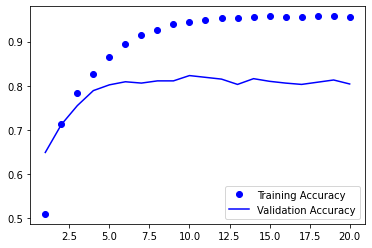

In [52]:
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.plot(title = "Multiclass Classification Accuracy")
plt.plot(ylabel = "Accuracy")
plt.plot(xlabel = "Epoch")
plt.legend()
plt.show()

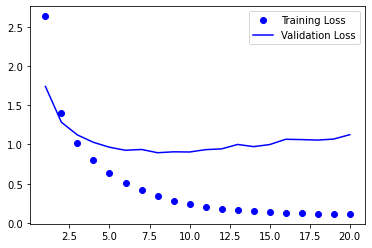

In [53]:
plt.clf()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.plot(title = "Multiclass Classifaction Loss")
plt.plot(xlabel = "Epoch")
plt.plot(ylabel = "Loss")
plt.legend()
plt.show()